<a href="https://colab.research.google.com/github/namangos7/namangos7/blob/Exercises/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Dog:
  species = "Canis familiaris"

  def __init__(self, name, age, breed):
    self.name = name
    self.age = age
    self.breed = breed 

  def __str__(self):
    return f"{self.name} is {self.age} years old" 

  def speak(self, sound="GRRR"):
    return f"{self.name} says {sound}"


In [ ]:
miles = Dog ("miles",7, "Alabai")

In [ ]:
miles.name

'miles'

In [ ]:
miles.breed

'Alabai'

In [ ]:
class GermanSheepard(Dog):
  def speak(self, sound = "Arfaf"):
    return super().speak(sound)

In [ ]:
Aktos = Dog("Aktos", 6, "Alabai")

In [ ]:
print(Aktos)

Aktos is 6 years old


In [ ]:
Aktos.speak

<bound method Dog.speak of <__main__.Dog object at 0x7fbc903ec9d0>>

In [ ]:
Aktos.speak('Woof')

'Aktos says Woof'

In [ ]:
Rex = GermanSheepard("Rex", 5, "GermanSheepard")

In [ ]:
print(Rex)

Rex is 5 years old


In [ ]:
Rex.speak

<bound method GermanSheepard.speak of <__main__.GermanSheepard object at 0x7fbc9041cb50>>

In [ ]:
Rex.speak("Grrr")

'Rex says Grrr'

In [ ]:
Rex.speak()

'Rex says Arfaf'

In [ ]:
Aktos.speak()

'Aktos says GRRR'

In [ ]:
Rex.speak()

'Rex says Arfaf'

tensor([[ 0.0000,  0.0000],
        [-0.0011,  0.0100],
        [-0.0011,  0.0202],
        [-0.0027,  0.0302],
        [-0.0009,  0.0404],
        [ 0.0242,  0.0443],
        [-0.0139,  0.0590],
        [ 0.0237,  0.0666],
        [ 0.0382,  0.0712],
        [ 0.0467,  0.0780]]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([[ 0.0000,  0.0000],
        [-0.0011,  0.0100],
        [-0.0011,  0.0202],
        [-0.0027,  0.0302],
        [-0.0009,  0.0404],
        [ 0.0242,  0.0443],
        [-0.0139,  0.0590],
        [ 0.0237,  0.0666],
        [ 0.0382,  0.0712],
        [ 0.0467,  0.0780]]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([[ 0.0000,  0.0000],
        [-0.0011,  0.0100],
        [-0.0011,  0.0202],
        [-0.0027,  0.0302],
        [-0.0009,  0.0404],
        [ 0.0242,  0.0443],
        [-0.0139,  0.0590],
        [ 0.0237,  0.0666],
        [ 0.0382,  0.0712],
        [ 0.0467,  0.0780]]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


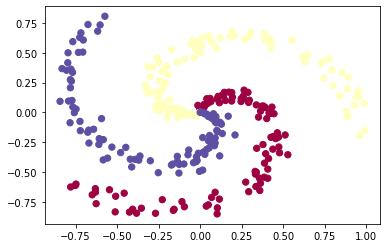

In [ ]:
# Code for creating a spiral dataset from CS231n
import torch
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib .pyplot as plt
NUM_CLASSES = 3
NUM_FEATURES = 2
RANDOM_SEED = 42
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
  X_spiral = torch.from_numpy(X).type(torch.float)
  y_spiral = torch.from_numpy(y).type(torch.LongTensor)
  print(X_spiral[:10], y_spiral[:10])
  
  X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral,
    y_spiral,
    test_size=0.2,
    random_state=RANDOM_SEED
)
  # lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

class SpiralMode(nn.Module):
  def __init__ (self, input_features, output_features, hidden_units=8):

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=output_features),

    )

  def forward(self, x):
      return self.linear_layer_stack(x)

model_exercise_2 = SpiralMode(input_features=NUM_FEATURES,
                                output_features=NUM_CLASSES,
                                hidden_units=8).to(device)
model_exercise_2
  

SpiralMode(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_exercise_2.parameters(), lr=0.3)

In [ ]:
model_exercise_2(X_spiral_train.to(device))[:5]

tensor([[-0.0539, -0.3467, -0.2058],
        [-0.0713, -0.3461, -0.2293],
        [-0.0709, -0.3821, -0.2485],
        [-0.2002, -0.3881, -0.4341],
        [-0.1259, -0.4288, -0.3455]], grad_fn=<SliceBackward0>)

In [ ]:
# Make prediction logits with model
y_logits = model_exercise_2(X_spiral_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.0733, -0.3828, -0.2455],
        [-0.0436, -0.3079, -0.1801],
        [-0.0832, -0.3917, -0.2734],
        [-0.0763, -0.3905, -0.2552],
        [-0.0595, -0.3522, -0.2111]], grad_fn=<SliceBackward0>)
tensor([[0.3883, 0.2849, 0.3268],
        [0.3788, 0.2908, 0.3304],
        [0.3904, 0.2868, 0.3228],
        [0.3896, 0.2846, 0.3258],
        [0.3838, 0.2864, 0.3298]], grad_fn=<SliceBackward0>)


In [ ]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3883, 0.2849, 0.3268], grad_fn=<SelectBackward0>)
tensor(0)


In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
torch.manual_seed(42)

epochs = 200
X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_blob_test = X_spiral_test.to(device), y_spiral_test.to(device)

for epoch in range(epochs):
    ### Training
    model_exercise_2.train()

    # 1. Forward pass
    y_logits = model_exercise_2(X_spiral_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_spiral_train) 
    acc = accuracy_fn(y_true=y_spiral_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_exercise_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_exercise_2(X_spiral_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_spiral_test)
      test_acc = accuracy_fn(y_true=y_spiral_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Train Loss: 1.10315, Acc: 32.50% | Test Loss: 1.11501, Test Acc: 38.33%
Epoch: 10 | Train Loss: 0.90035, Acc: 54.17% | Test Loss: 0.89712, Test Acc: 58.33%
Epoch: 20 | Train Loss: 0.83606, Acc: 63.75% | Test Loss: 0.79588, Test Acc: 66.67%
Epoch: 30 | Train Loss: 0.70367, Acc: 69.17% | Test Loss: 0.74392, Test Acc: 66.67%
Epoch: 40 | Train Loss: 0.68078, Acc: 68.75% | Test Loss: 0.75434, Test Acc: 66.67%
Epoch: 50 | Train Loss: 0.66931, Acc: 69.17% | Test Loss: 0.73895, Test Acc: 66.67%
Epoch: 60 | Train Loss: 0.66084, Acc: 69.58% | Test Loss: 0.74361, Test Acc: 66.67%
Epoch: 70 | Train Loss: 0.65792, Acc: 69.58% | Test Loss: 0.73555, Test Acc: 66.67%
Epoch: 80 | Train Loss: 0.65442, Acc: 69.58% | Test Loss: 0.74042, Test Acc: 66.67%
Epoch: 90 | Train Loss: 0.64621, Acc: 67.92% | Test Loss: 0.72620, Test Acc: 65.00%
Epoch: 100 | Train Loss: 0.63284, Acc: 69.17% | Test Loss: 0.73930, Test Acc: 66.67%
Epoch: 110 | Train Loss: 0.62035, Acc: 71.25% | Test Loss: 0.70442, Test Acc

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


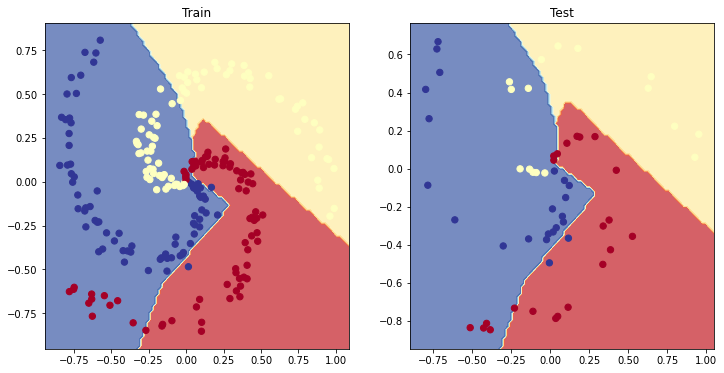

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_exercise_2, X_spiral_train, y_spiral_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_exercise_2, X_spiral_test, y_spiral_test)